In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)

business_licenses = pd.read_csv('BusinessLicenses_cleaned.txt', sep='|', engine='python')

# sort business names ascending
business_licenses.sort_values(['LicenseNumber'], ascending=True, inplace=True)

In [14]:
# business_licenses.reset_index(inplace=True)
business_licenses.head()

,BusinessName,LicenseNumber,LicenseType,ServiceStreet,ServiceStreet2,ServiceUnitType,ServiceUnit,ServiceCity,ServiceCounty,ServiceState,ServiceZip,ServiceCountry,IssuedDate,MailingStreet,MailingStreet2,MailingUnitType,MailingUnit,MailingCity,MailingCounty,MailingState,MailingZip,MailingCountry
21690,A-ACCENT PLUMBING INC,27,TPS,2721 E INDIAN SCHOOL RD,NaN,NaN,NaN,PHOENIX,MARICOPA,AZ,850166855,USA,2016-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10381,ASSOCIATED FINISHES INC,168,TPS,7335 E ACOMA DR STE 101,NaN,STE,101,SCOTTSDALE,MARICOPA,AZ,852603120,USA,2015-12-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11045,BARRY'S DANCE THEATRE SHOP,206,TPS,2246 N SCOTTSDALE RD,NaN,NaN,NaN,SCOTTSDALE,MARICOPA,AZ,852572125,USA,2015-12-28 00:00:00,2246 N SCOTTSDALE RD,NaN,NaN,NaN,SCOTTSDALE,MARICOPA,AZ,852572125,USA
2447,BASHAS 16,211,TPS,8423 E MCDONALD DR,NaN,NaN,NaN,SCOTTSDALE,MARICOPA,AZ,852506326,USA,2015-12-01 00:00:00,PO BOX 488,NaN,NaN,NaN,CHANDLER,MARICOPA,AZ,852440488,USA
23568,BOOTZ AND DUKE SIGN COMPANY,285,TPS,4028 W WHITTON AVE,NaN,NaN,NaN,PHOENIX,MARICOPA,AZ,850193623,USA,2015-12-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# which countries have the highest number of Service Addresses
business_licenses.groupby('ServiceCountry')['ServiceCountry'].count()

ServiceCountry
AUS    1    
CAN    24   
GRB    1    
NEZ    1    
SAF    1    
USA    25727
Name: ServiceCountry, dtype: int64

In [4]:
# a 9 digit 'ServiceZip' defines a relatively small geographical area
# which businesses have a large number of locations within these areas?

business_licenses.groupby(['ServiceZip','BusinessName'])['ServiceZip'].count().sort_values(ascending=False).head(30)

ServiceZip  BusinessName                  
852574101   2778 LOKER LLC                    12
852574102   2778 LOKER LLC                    12
852514719   SUNSCAPE VILLAS                   12
852514705   SUNSCAPE VILLAS                   6 
852510000   CAMEL INVESTMENT LLC              5 
852600000   CIMARRON INDUSTRIAL PARTNERS L    5 
852515540   RB5M PROPERTIES LLC               4 
852515584   RB5M PROPERTIES LLC               4 
852602614   NSHE LISCO LLC                    4 
852516726   KODIAK PROPERTIES LLC             4 
852550000   MP ROW LLC                        4 
852572997   BURTON LIVING TRUST               3 
852572998   BURTON LIVING TRUST               3 
852572459   DRALA LLC                         3 
852505658   HUSTON                            3 
852515363   68TH STREET CONDOS LLC            3 
852516727   HEYNS HOLDINGS LLC                3 
852514708   SUNSCAPE VILLAS                   3 
852545251   TROJAN DEVELOPMENT ASSOCIATES     2 
852602502   SCOTTSDALE AIR

In [5]:
# which businesses have the most duplicate names?
business_licenses.groupby(['BusinessName'])['BusinessName'].count().sort_values(ascending=False).head(30)

BusinessName
SUNSCAPE VILLAS                   27
2778 LOKER LLC                    24
WELLS FARGO BANK NA               18
EDWARD D JONES & CO LP            17
INVITATION HOMES                  15
HONORHEALTH                       15
WL SCOTTSDALE THOMAS OWNER LLC    12
SCOTTSDALE MEDICAL IMAGING        12
SHIPP LTD                         12
JPMORGAN CHASE BANK NATIONAL A    11
SCA ARIZONA LLC                   10
LONGFORD PROPERTY                 10
SOUTHWEST DIAGNOSTIC IMAGING L    10
WELLS FARGO ADVISORS LLC          10
PARNIMUS LLC                      10
SCOTTSDALE CANAL PROJECT LLC      10
CAMEL INVESTMENT LLC              9 
AMERICAN HOMES 4 RENT LP          8 
RB5M PROPERTIES LLC               8 
MARICOPA AMBULANCE                8 
DOROTHY SIMMONS RENTALS           8 
RAY FLEEK & MARILYN FLEEK         8 
BROOKS BUILDING INC               8 
BOWMAN                            8 
MI SCOTTSDALE LLC                 7 
TEAM SIMMONS                      7 
CACTUS RESIDENTIAL PROPER

In [6]:
business_licenses.groupby(['ServiceState'])['ServiceState'].count().sort_values(ascending=False).head(20)

ServiceState
AZ    21696
CA    816  
TX    293  
IL    195  
FL    185  
NY    173  
MN    161  
GA    148  
CO    146  
NJ    144  
OH    143  
PA    133  
MA    129  
WA    114  
WI    104  
NC    104  
UT    101  
MI    91   
TN    71   
VA    65   
Name: ServiceState, dtype: int64

In [7]:
# which states outside of AZ have the largest number of businesses registed within Scottsdale?

non_az = business_licenses[~business_licenses['ServiceState'].str.contains('AZ', na=False)] \
    .groupby('ServiceState')['ServiceState'] \
    .count().sort_values(ascending=False) \
    .head(20)

non_az = non_az.to_frame()
non_az

,ServiceState
ServiceState,
CA,816
TX,293
IL,195
FL,185
NY,173
MN,161
GA,148
CO,146
NJ,144


Text(0.5, 0, 'States')

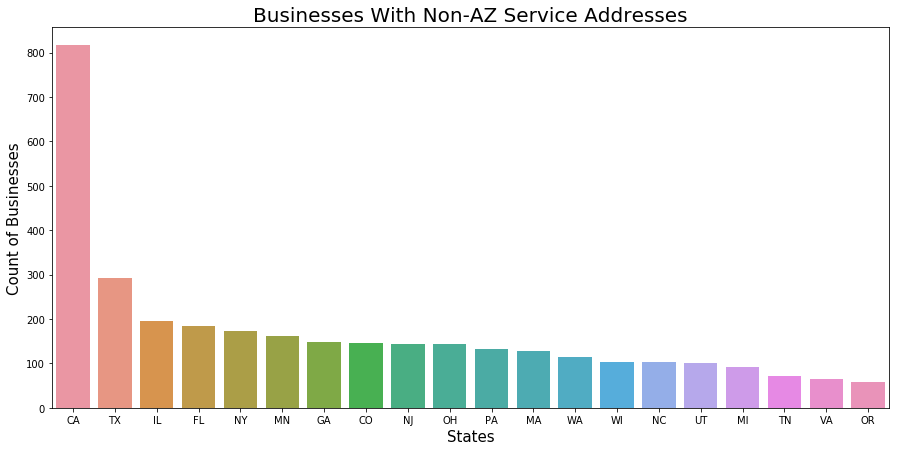

In [9]:
plt.rcParams["figure.figsize"] = [15, 7]

ax = sns.barplot(x=non_az.index, y=non_az.iloc[:,0])

plt.title("Businesses With Non-AZ Service Addresses",fontsize=20)
plt.ylabel("Count of Businesses",fontsize=15)
plt.xlabel("States",fontsize=15)

# plt.tick_params(labelsize=17)

Text(0, 0.5, 'Count')

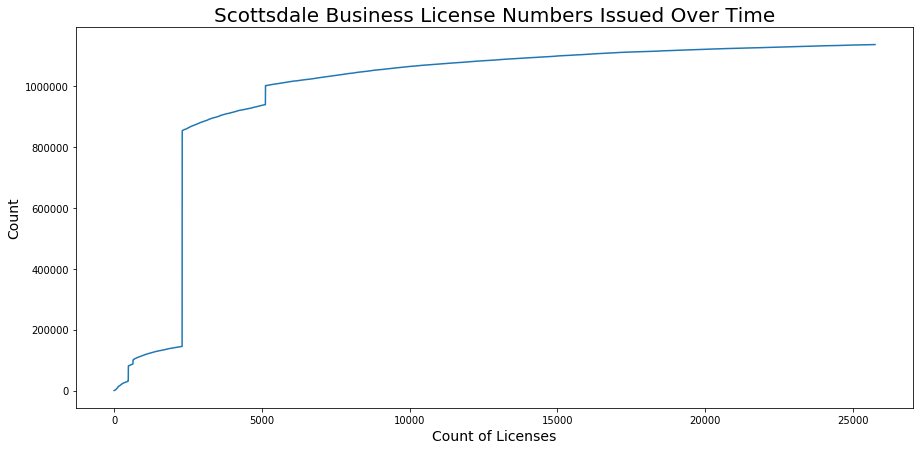

In [21]:
plt.rcParams["figure.figsize"] = [15, 7]    #sets the ploted size
plt.title("Scottsdale Business License Numbers Issued Over Time",fontsize=20)
plt.xlabel("Count of Licenses",fontsize=14)
plt.ylabel("License Number",fontsize=14)

sns.lineplot(data=business_licenses['LicenseNumber'])
plt.rcParams["figure.figsize"] = [15, 7]
plt.ylabel('Count')

# this confirms to me that business license numbers may have been sequentialy at the beginning, but this is no longer the case
# unsure what accounts for the steep spikes 

Text(0, 0.5, 'Count')

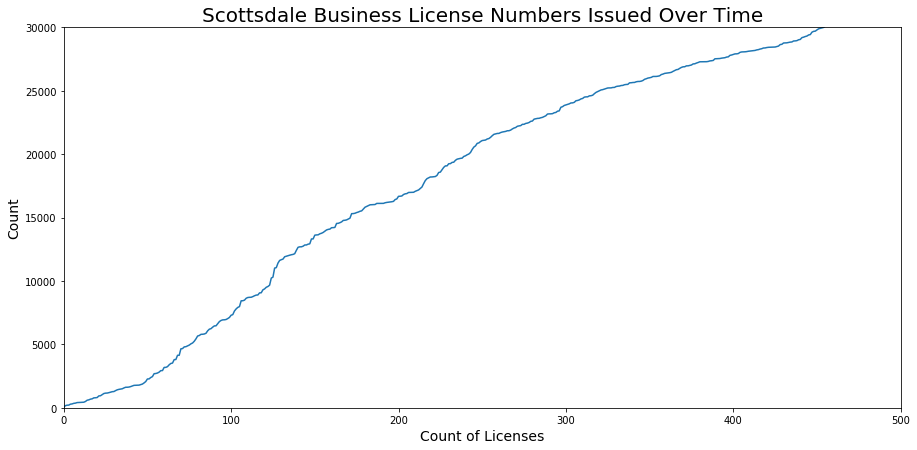

In [22]:
plt.rcParams["figure.figsize"] = [15, 7]    #sets the ploted size
plt.title("Scottsdale Business License Numbers Issued Over Time",fontsize=20)
plt.xlabel("Count of Licenses",fontsize=14)
plt.ylabel("License Number",fontsize=14)


plt.ylim(0, 30000) #examine just business numbers under 2000
plt.xlim(0, 500)

sns.lineplot(data=business_licenses['LicenseNumber'])
plt.rcParams["figure.figsize"] = [15, 7]
plt.ylabel('Count')